In [14]:
#import libraries
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#create functions for random number and path simulation

def randoms(timesteps, n_paths):
    random_array = np.random.standard_normal((timesteps, n_paths))
    return random_array

def price_path_euler(S0, T, sigma, dt, timesteps, n_paths):
    S = np.zeros((timesteps, n_paths)) #create a matrix with only zeroes
    S[0] = S0
    random_path = randoms(timesteps, n_paths)
    for t in range(1, timesteps , 1):
        S[t] = S[t-1] * ( 1 + r * dt + sigma * math.sqrt(dt) * random_path[t-1] )
    plt.figure(figsize=(20, 12))
    plt.title('100 Simulated Stocks Paths with Euler Method',fontweight="bold", pad=20)
    plt.xlabel('Steps')
    plt.ylabel('Price')
    plt.plot(S[:, :50]);
    
    plt.figure(figsize=(10,6))
    plt.hist(S[-1], bins=45)
    plt.title('Histogram of Final Value of the Stock',fontweight="bold", pad=20);
    plt.axvline(S[-1].mean(), c='b');
    # plt.savefig('histogram.png', facecolor='None')
    
    S_sim = np.zeros(n_paths)
    for x in range(0,n_paths):
        S_sim[x] = S[-1][0:x+1].mean()

    plt.figure(figsize=(10, 6))
    plt.title('Convergence Into Mathematical Value for Euler Method',fontweight="bold", pad=20)
    plt.xlabel('Iterations')
    plt.ylabel('Final Price')
    plt.plot(S_sim);
    return S

def price_path_logeuler(S0, T, sigma, dt, timesteps, n_paths):
    S = np.zeros((timesteps, n_paths)) #create a matrix with only zeroes
    S[0] = S0
    random_path = randoms(timesteps, n_paths)
    for t in range(1, timesteps , 1):
        S[t] = S[t-1] * np.exp(((r - 0.5 * sigma ** 2) * dt + sigma * math.sqrt(dt) * random_path[t-1]))
    return S

def price_path_singlejump_logeuler(S0, T, sigma, n_paths):
    S = np.zeros((2, n_paths)) #create a matrix with only zeroes
    S[0] = S0
    random_path = randoms(1, n_paths)
    S[1] = S[0] * np.exp(((r - 0.5 * sigma ** 2) * T + sigma * math.sqrt(T) * random_path[0]))
    return S

In [15]:
#declare model parameters
S0 = 100 #today's strock price
K = 99 #Strike
T = 1 #Time to expiry
sigma = 0.2 #constant long term volatility
r = 0.01 #constant risk-free rate

#declare simulation parameters
n_paths = 500 # number of paths generated
#n_paths2 = 100
#n_paths3 = 100
timesteps = 252 #number of timesteps to maturity
#timesteps2 = 100
#timesteps3 = 200
#n_updates = 252 # number of price updates our lookback options will perform
dt=T/timesteps


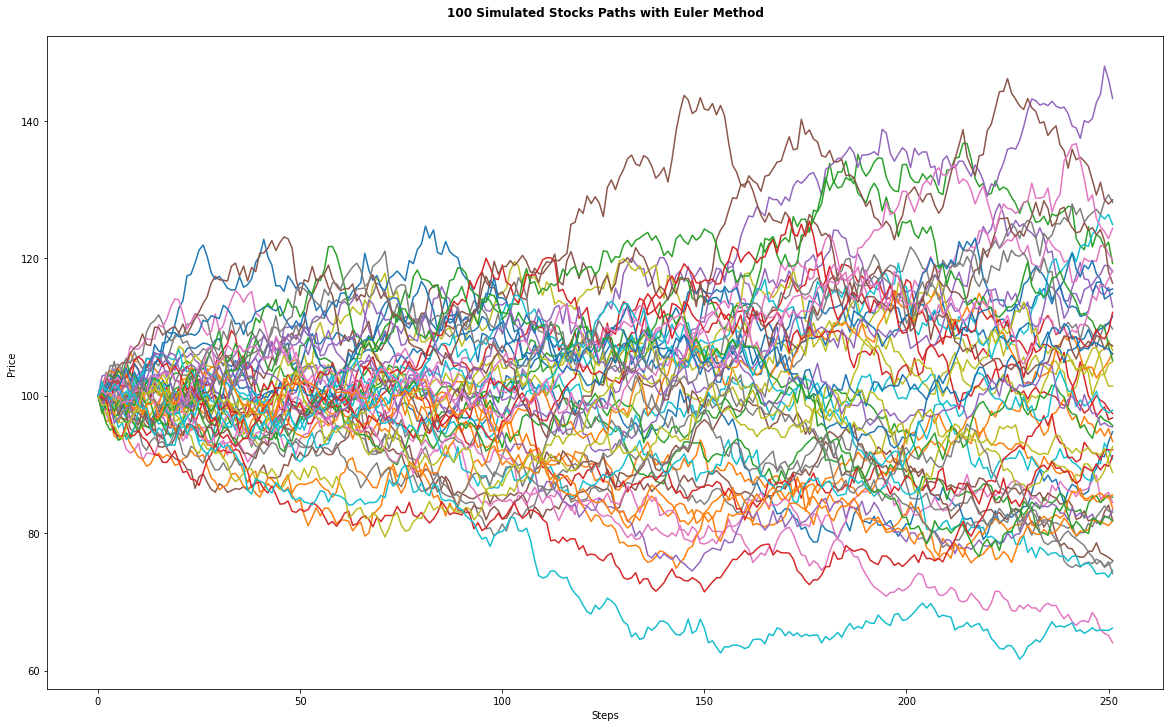

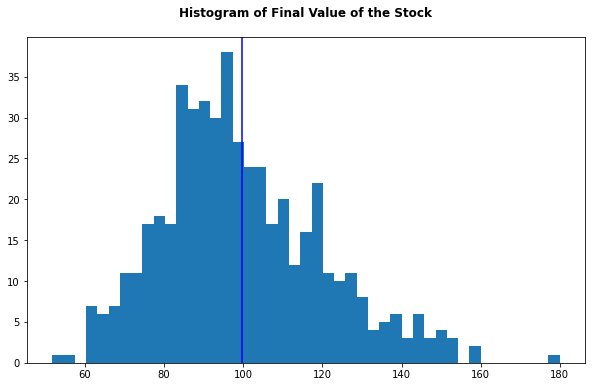

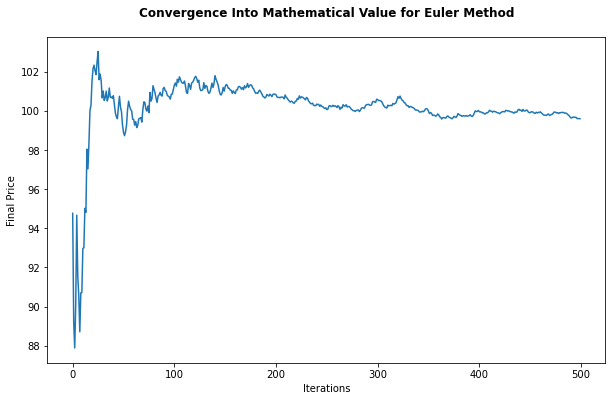

In [16]:
option = price_path_euler(S0, T, sigma, dt, timesteps, n_paths)

In [17]:
def value_european_call(S, K):
    dt = T/S.shape[0]
    discount_factor = math.exp(-r*dt)
    europeanpayoff_array = np.zeros(S.shape[1])
    for n in range (0, S.shape[1], 1):
        europeanpayoff_array[n] = max(S[S.shape[0]-1, n] - K, 0) * discount_factor ** S.shape[0]
    value = np.mean(europeanpayoff_array)
    return value

def value_european_put(S, K):
    dt = T/S.shape[0]
    discount_factor = math.exp(-r*dt)
    europeanpayoff_array = np.zeros(S.shape[1])
    for n in range (0, S.shape[1], 1):
        europeanpayoff_array[n] = max(K - S[S.shape[0]-1, n], 0) * discount_factor ** S.shape[0]
    value = np.mean(europeanpayoff_array)
    return value

def value_binary_call(S, K):
    dt = T/S.shape[0]
    discount_factor = math.exp(-r*dt)
    binarypayoff_array = np.zeros(S.shape[1])
    for n in range (0, S.shape[1], 1):
        if S[S.shape[0]-1, n] >= K: binarypayoff_array[n] = 1 * discount_factor ** S.shape[0]
        else: binarypayoff_array[n] = 0
    value = np.mean(binarypayoff_array)
    return value

def value_binary_put(S, K):
    dt = T/S.shape[0]
    discount_factor = math.exp(-r*dt)
    binarypayoff_array = np.zeros(S.shape[1])
    for n in range (0, S.shape[1], 1):
        if S[S.shape[0]-1, n] >= K: binarypayoff_array[n] = -1 * discount_factor ** S.shape[0]
        else: binarypayoff_array[n] = 0
    value = np.mean(binarypayoff_array)
    return value

def value_lookback_call_floating_strike_discrete(S, n_updates):
    dt = T/S.shape[0]
    discount_factor = math.exp(-r*dt)
    size = S.shape[1]/n_updates
    lookbackpayoff_array = np.zeros(int(size))
    for n in range (0, int(size), 1):
        lookbackpayoff_array[n] = max(S[S.shape[0]-1, n] - min(S[:,n]), 0) * discount_factor ** S.shape[0]
    value = np.mean(lookbackpayoff_array)
    return value

def value_lookback_call_floating_strike_continuous(S):
    dt = T/S.shape[0]
    discount_factor = math.exp(-r*dt)
    lookbackpayoff_array = np.zeros(S.shape[1])
    for n in range (0, S.shape[1], 1):
        lookbackpayoff_array[n] = max(S[S.shape[0]-1, n] - min(S[:,n]), 0) * discount_factor ** S.shape[0]
    value = np.mean(lookbackpayoff_array)
    return value

def value_lookback_put_floating_strike_discrete(S, n_updates):
    dt = T/S.shape[0]
    discount_factor = math.exp(-r*dt)
    size = S.shape[1]/n_updates
    lookbackpayoff_array = np.zeros(int(size))
    for n in range (0, int(size), 1):
        lookbackpayoff_array[n] = max(max(S[:,n]) - S[S.shape[0]-1, n], 0) * discount_factor ** S.shape[0]
    value = np.mean(lookbackpayoff_array)
    return value

def value_lookback_put_floating_strike_continuous(S):
    dt = T/S.shape[0]
    discount_factor = math.exp(-r*dt)
    lookbackpayoff_array = np.zeros(S.shape[1])
    for n in range (0, S.shape[1], 1):
        lookbackpayoff_array[n] = max(max(S[:,n]) - S[S.shape[0]-1, n], 0) * discount_factor ** S.shape[0]
    value = np.mean(lookbackpayoff_array)
    return value

def value_lookback_call_fixed_strike_discrete(S, K, n_updates):
    dt = T/S.shape[0]
    discount_factor = math.exp(-r*dt)
    size = S.shape[1]/n_updates
    lookbackpayoff_array = np.zeros(int(size))
    for n in range (0, int(size), 1):
        lookbackpayoff_array[n] = max(max(S[:,n]) - K, 0) * discount_factor ** S.shape[0]
    value = np.mean(lookbackpayoff_array)
    return value

def value_lookback_call_fixed_strike_continuous(S, K):
    dt = T/S.shape[0]
    discount_factor = math.exp(-r*dt)
    lookbackpayoff_array = np.zeros(S.shape[1])
    for n in range (0, S.shape[1], 1):
        lookbackpayoff_array[n] = max(max(S[:,n]) - K, 0) * discount_factor ** S.shape[0]
    value = np.mean(lookbackpayoff_array)
    return value

def value_lookback_put_fixed_strike_discrete(S, K, n_updates):
    dt = T/S.shape[0]
    discount_factor = math.exp(-r*dt)
    size = S.shape[1]/n_updates
    lookbackpayoff_array = np.zeros(int(size))
    for n in range (0, int(size), 1):
        lookbackpayoff_array[n] = max(K - min(S[:,n]), 0) * discount_factor ** S.shape[0]
    value = np.mean(lookbackpayoff_array)
    return value

def value_lookback_put_fixed_strike_continuous(S, K):
    dt = T/S.shape[0]
    discount_factor = math.exp(-r*dt)
    lookbackpayoff_array = np.zeros(S.shape[1])
    for n in range (0, S.shape[1], 1):
        lookbackpayoff_array[n] = max(K - min(S[:,n]), 0) * discount_factor ** S.shape[0]
    value = np.mean(lookbackpayoff_array)
    return value

In [18]:
euc=value_european_call(option,99)
eup=value_european_put(option, 99)
lbc_fixed=value_lookback_call_fixed_strike_discrete(option,99, 100)
lbc_float=value_lookback_call_floating_strike_discrete(option, 100)
lbp_fixed=value_lookback_put_fixed_strike_discrete(option,99, 100)
lbp_float=value_lookback_put_floating_strike_discrete(option, 100)
print("Euler Method")
print("value_european_call = ", euc, "\n"
      "value_european_put = ", eup, "\n"
      "value_lookback_call_fixed_strike_discrete = ", lbc_fixed, "\n"
      "value_lookback_call_floating_strike_discrete = ", lbc_float, "\n"
      "value_lookback_put_fixed_strike_discrete = ", lbp_fixed, "\n"
      "value_lookback_put_floating_strike_discrete = ", lbp_float, "\n")

Euler Method
value_european_call =  8.220295868278628 
value_european_put =  7.631453636162427 
value_lookback_call_fixed_strike_discrete =  14.813634011222922 
value_lookback_call_floating_strike_discrete =  7.058229678533962 
value_lookback_put_fixed_strike_discrete =  11.350577820718874 
value_lookback_put_floating_strike_discrete =  19.103940558004293 



### Asian Option


In [22]:
import numpy as np
from scipy.special import erf


class AsianOptionMC_MC(object):
    """ Class for Asian options pricing using control variate
    S0 : float : initial stock/index level
    strike : float : strike price
    T : float : time to maturity (in year fractions)
    M : int : grid or granularity for time (in number of total points)
    r : float : constant risk-free short rate
    div :    float : dividend yield
    sigma :  float : volatility factor in diffusion term 
    """

    def __init__(self, option_type, S0, strike, T, M, r, div, sigma, simulations):
        try:
            self.option_type = option_type
            assert isinstance(option_type, str)
            self.S0 = float(S0)
            self.strike = float(strike)
            self.T = float(T)
            self.M = int(M)
            self.r = float(r)
            self.div = float(div)
            self.sigma = float(sigma)
            self.simulations = int(simulations)
        except ValueError:
            print('Error passing Options parameters')

        if option_type != 'call' and option_type != 'put':
            raise ValueError("Error: option type not valid. Enter 'call' or 'put'")
        if S0 < 0 or strike < 0 or T <= 0 or r < 0 or div < 0 or sigma < 0:
            raise ValueError('Error: Negative inputs not allowed')

        self.time_unit = self.T / float(self.M)
        self.discount = np.exp(- self.r * self.T)

    @property
    def GeometricAsianOption(self):
        sigsqT = ((self.sigma ** 2 * self.T * (self.M + 1) * (2 * self.M + 1))
                  / (6 * self.M * self.M))
        muT = (0.5 * sigsqT + (self.r - 0.5 * self.sigma ** 2)
               * self.T * (self.M + 1) / (2 * self.M))
        d1 = ((np.log(self.S0 / self.strike) + (muT + 0.5 * sigsqT))
              / np.sqrt(sigsqT))
        d2 = d1 - np.sqrt(sigsqT)
        N1 = 0.5 * (1 + erf(d1 / np.sqrt(2)))
        N2 = 0.5 * (1 + erf(d2 / np.sqrt(2)))
        geometric_value = self.discount * (self.S0 * np.exp(muT) * N1 - self.strike * N2)
        return geometric_value

    @property
    def price_path(self, seed = 100):
        np.random.seed(seed)
        price_path = (self.S0 *
                      np.cumprod (np.exp ((self.r - 0.5 * self.sigma ** 2) * self.time_unit +
                                    self.sigma * np.sqrt(self.time_unit) 
                                          * np.random.randn(self.M,self.simulations)), 1))
        plt.figure(figsize=(20, 12))
        plt.title('100 Simulated Stocks Paths for Asian Options',fontweight="bold", pad=20)
        plt.xlabel('Steps')
        plt.ylabel('Price')
        plt.plot(price_path[:, :5]);
        
        plt.figure(figsize=(10,6))
        plt.hist(price_path[-1], bins=45)
        plt.title('Histogram of Final Value of the Stock',fontweight="bold", pad=20);
        plt.axvline(price_path[-1].mean(), c='b');
        # plt.savefig('histogram.png', facecolor='None')
        
        S_sim = np.zeros(self.simulations)
        for x in range(0,self.simulations):
            S_sim[x] = price_path[-1][0:x+1].mean()
        plt.figure(figsize=(10, 6))
        plt.title('Convergence Into Mathematical Value',fontweight="bold", pad=20)
        plt.xlabel('Iterations')
        plt.ylabel('Final Price')
        plt.plot(S_sim);
        # plt.savefig('convergence.png', facecolor='None')
        return price_path

    @property
    def MCPayoff(self): #asian payoff = (1/T\int_0^T S_tdt - K)^+ #lookback payoff = S_T - Min(S_t, t<=T) 
        if self.option_type == 'call':
            MCpayoff =  np.maximum((self.discount*np.mean(self.price_path,1))-self.strike, 0) 
        else:
            MCpayoff = np.maximum(self.strike-(self.discount*np.mean(self.price_path,1)), 0)
        return MCpayoff
    
    @property 
    def value(self):
        MCvalue = np.mean(self.MCPayoff)
        MCValue_std = np.std(self.MCPayoff)
        upper_bound = MCvalue + 1.96 * MCValue_std/np.sqrt(self.simulations)
        lower_bound = MCvalue - 1.96 * MCValue_std/np.sqrt(self.simulations)
        return MCvalue, lower_bound, upper_bound
    

In [23]:
AsianCall = AsianOptionMC_MC('call', 100., 99., 1., 252, .01, 0, .20, 100)

Asian Call values
 MC value           Lower Bound         Upper Bound
(3.329538369176146, 2.4428012813222653, 4.216275457030027)


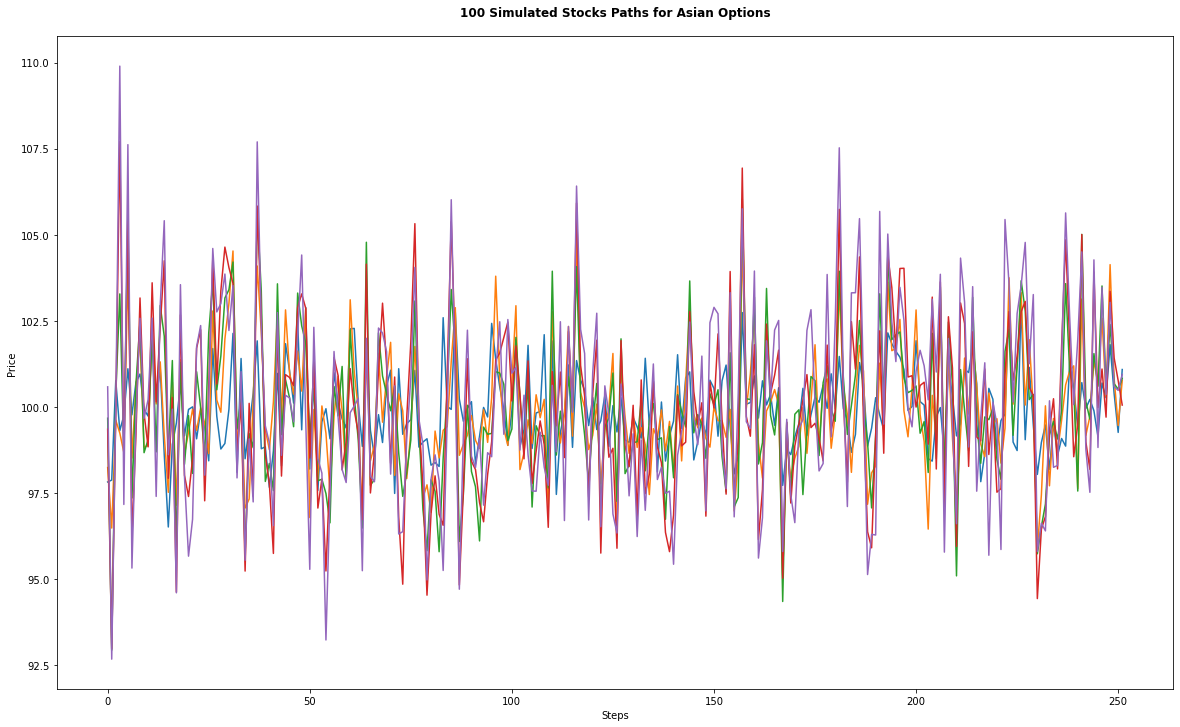

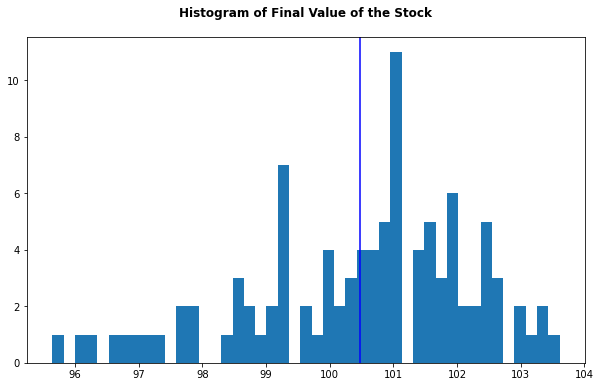

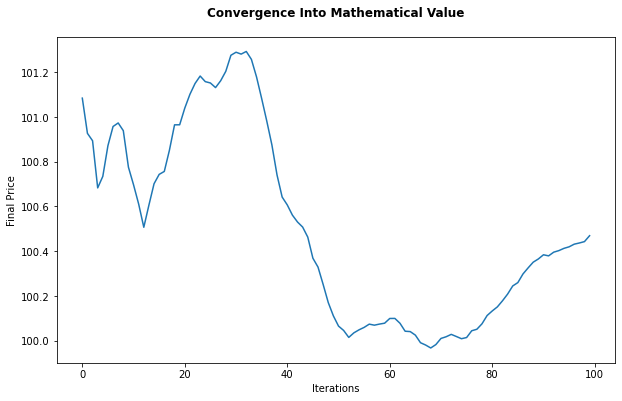

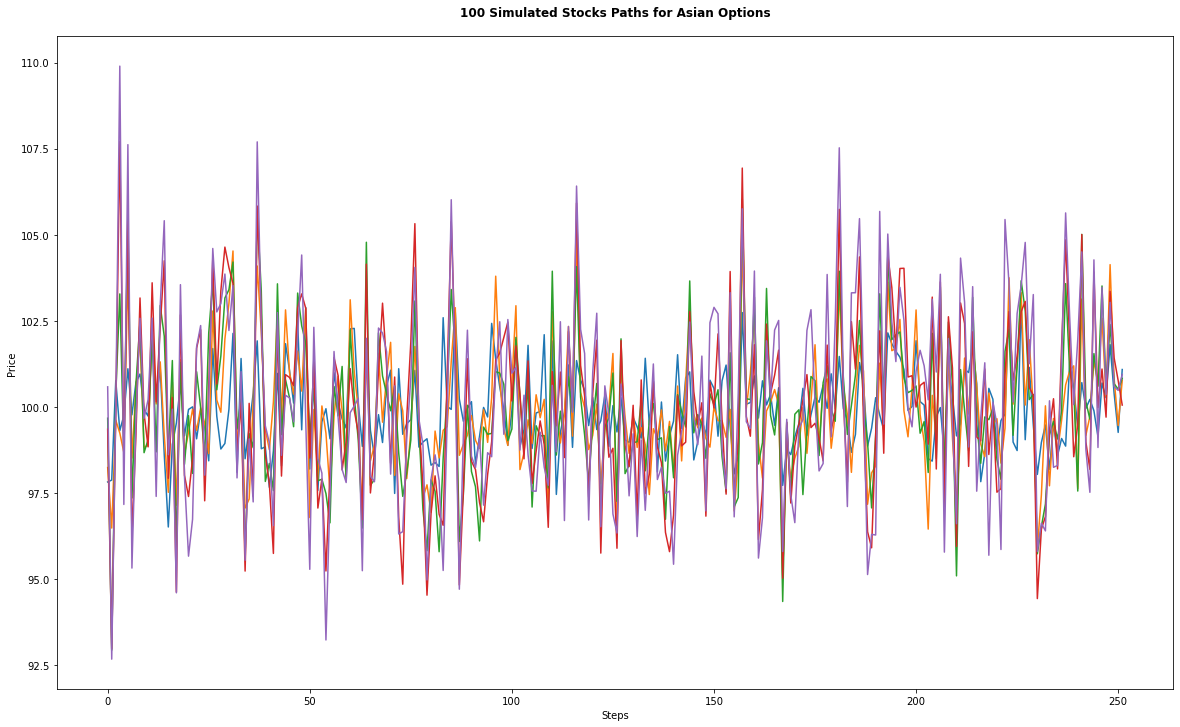

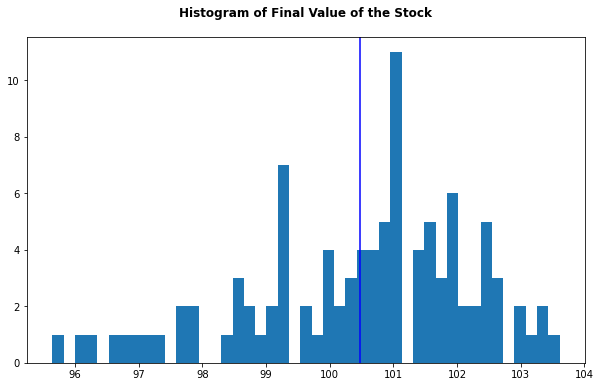

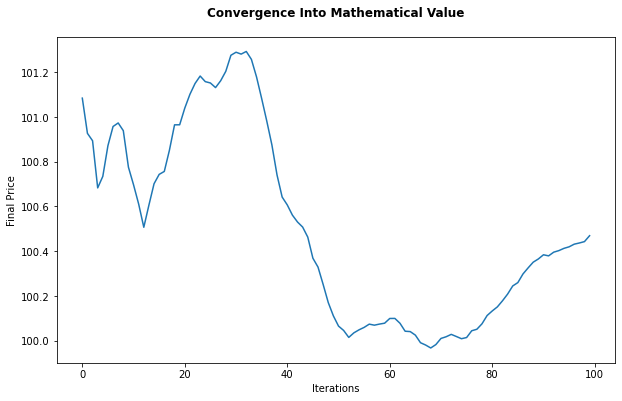

In [33]:
print("Asian Call values")
print(" MC value           Lower Bound         Upper Bound")
print(AsianCall.value)

array([ 0.        ,  0.        ,  7.93528637, 17.70506622,  0.        ,
       11.79730413,  0.        ,  0.        ,  6.35549925,  0.        ,
        2.34195327,  5.57387862, 13.05308223,  3.28237003, 10.81024905,
        5.59378427,  0.        ,  0.        ,  1.48071224,  0.        ,
        0.6845226 , 10.98345518,  2.81516865,  2.97015867,  0.        ,
       12.03862554, 11.04578292,  2.23324997,  2.26963257, 11.3917233 ,
        3.08553277,  7.47403838,  2.6395106 ,  0.        ,  0.        ,
        1.23115151,  0.        ,  7.44832576,  3.67424553,  3.45712999,
       10.73386434,  0.        , 14.70724211,  0.        ,  0.        ,
        2.53855143,  0.        ,  0.        ,  0.        ,  9.39792748,
        0.        ,  0.51859481,  0.        ,  1.17740746,  0.        ,
        0.        ,  8.19551471,  0.        ,  0.        ,  0.        ,
        0.52063052,  0.        ,  0.        ,  0.        ,  7.97320313,
        0.        ,  0.        ,  0.        ,  0.        ,  6.55

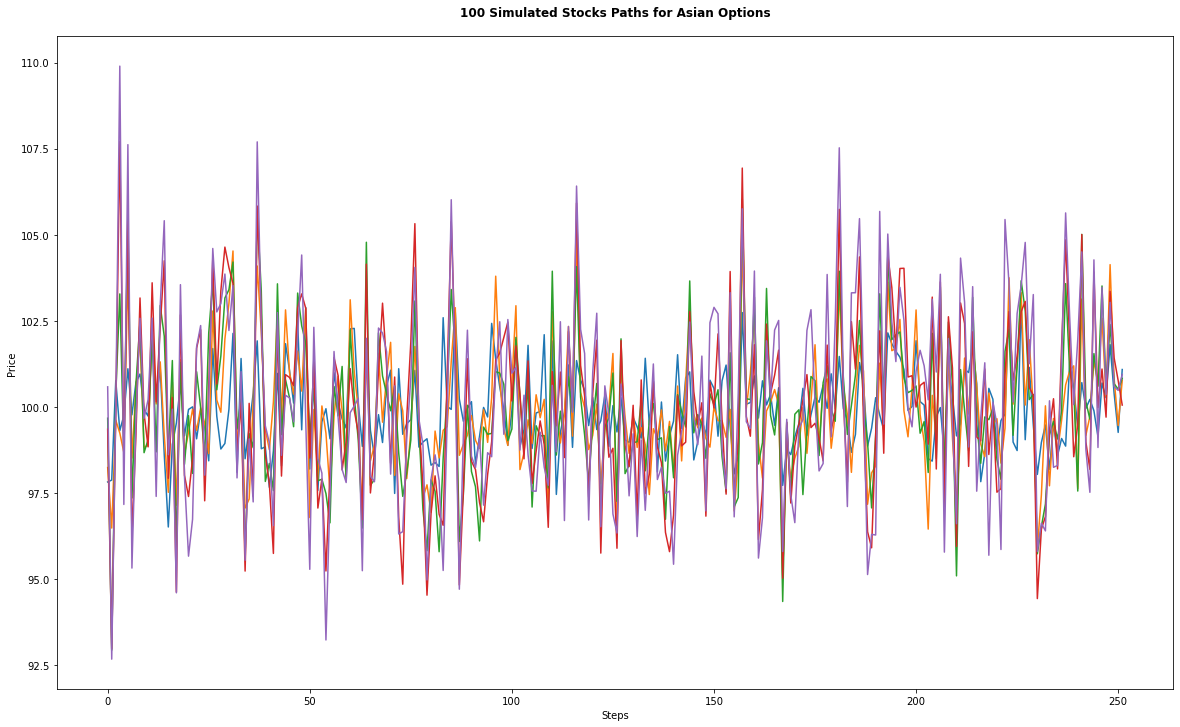

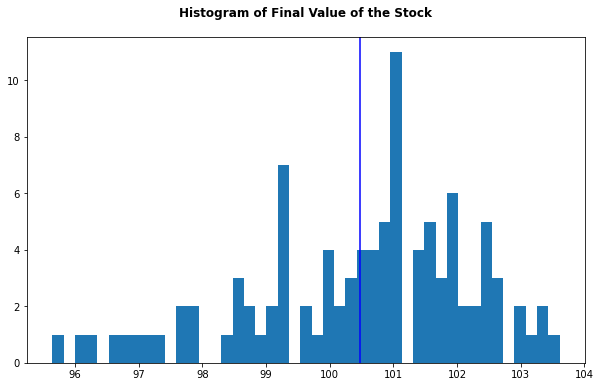

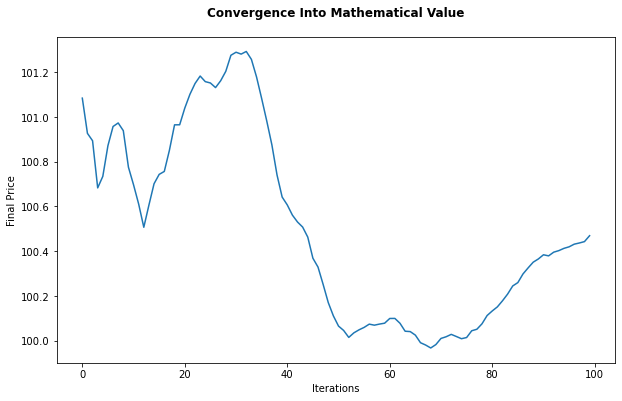

In [25]:
AsianCall.MCPayoff

array([[ 97.81574253,  98.23506366,  99.66857368, ...,  90.35178556,
         90.13784758,  87.35369108],
       [ 97.87135546,  96.47642629,  92.92556115, ...,  90.06041213,
         89.37865834,  91.16764682],
       [100.76041037,  99.611571  , 100.35334843, ..., 116.71046635,
        113.97244649, 114.23004362],
       ...,
       [100.38218968, 100.81747116, 100.67012059, ..., 112.752427  ,
        113.12721519, 112.63205567],
       [ 99.25623697,  99.45692709, 100.51437663, ...,  85.31200351,
         87.59190956,  87.6678962 ],
       [101.08400046, 100.76928816, 100.82772743, ..., 100.9479612 ,
        101.04612042, 103.08807068]])

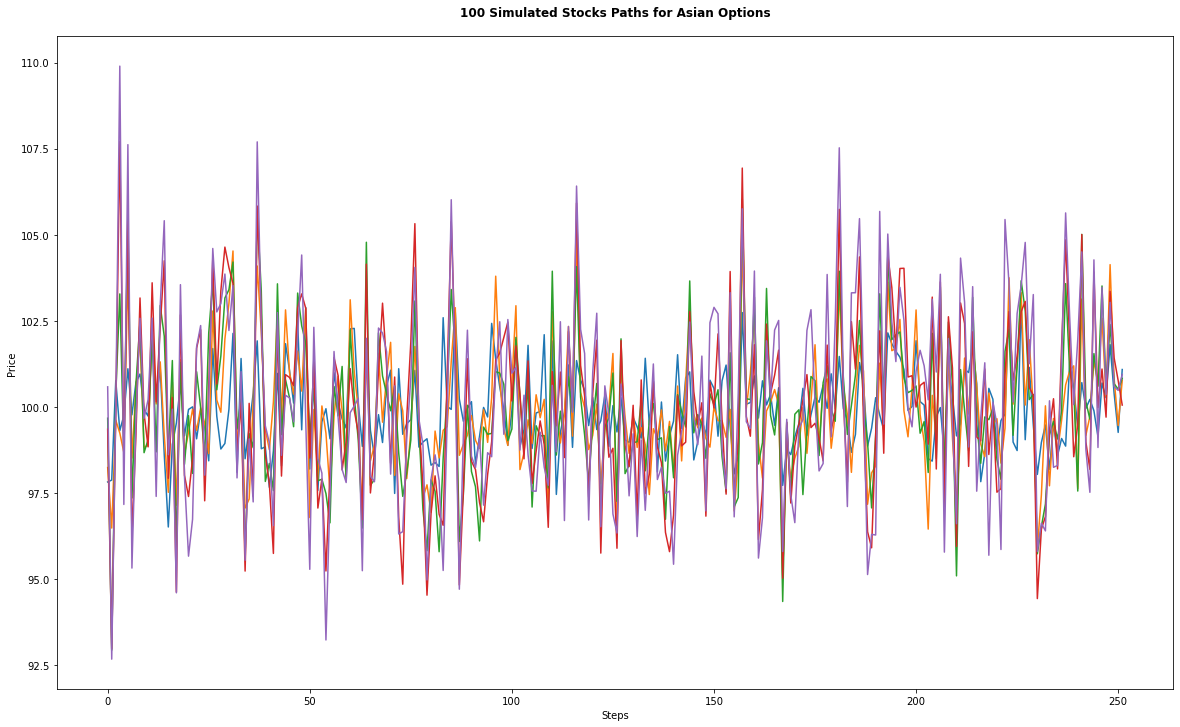

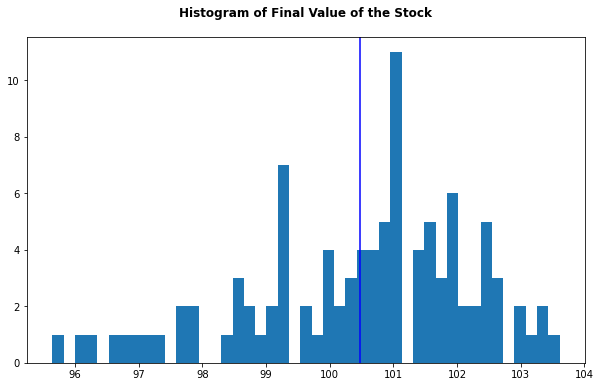

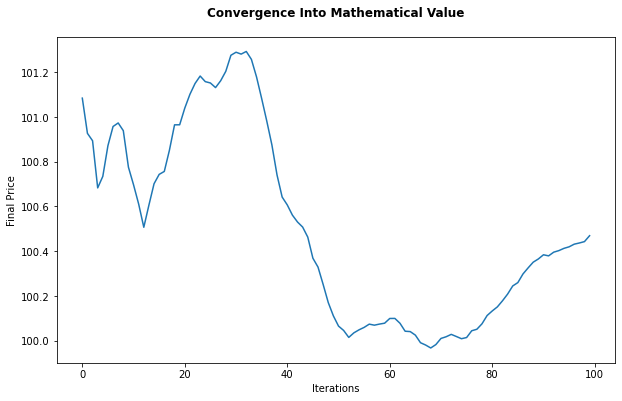

In [26]:
AsianCall.price_path

Asian Put values
 MC value           Lower Bound         Upper Bound
(2.589497726515939, 1.821220464048753, 3.357774988983125)


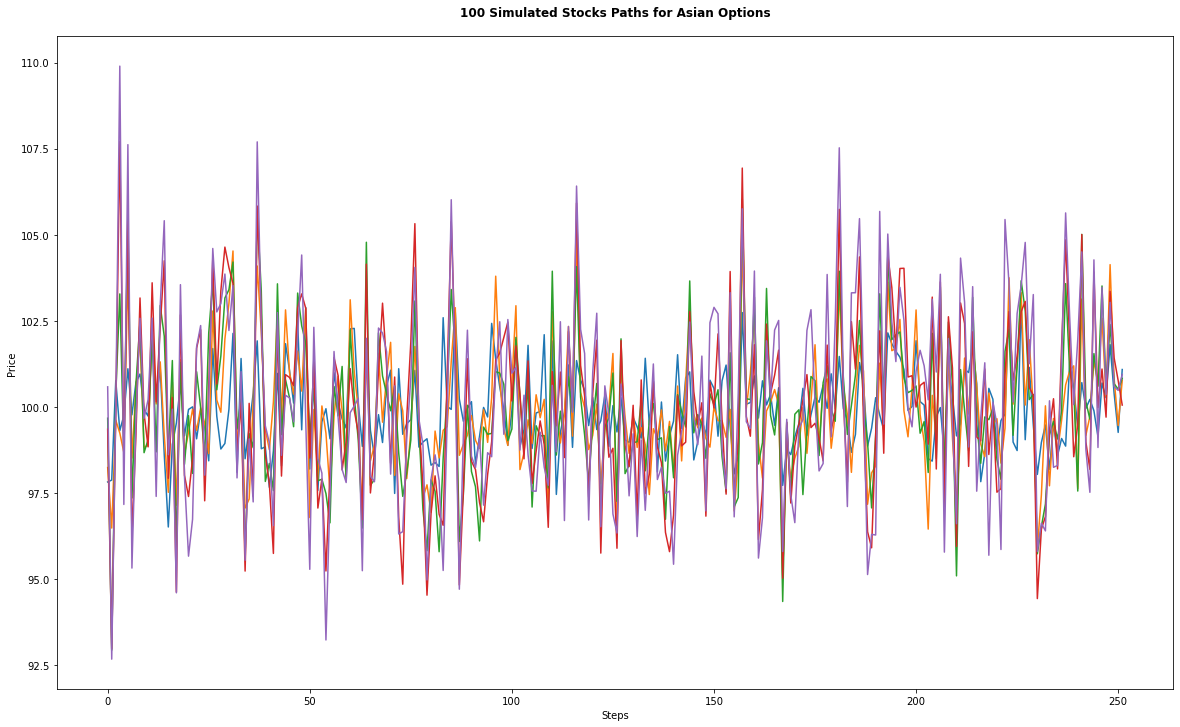

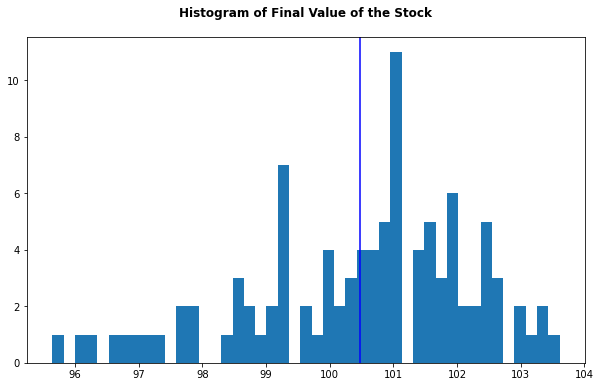

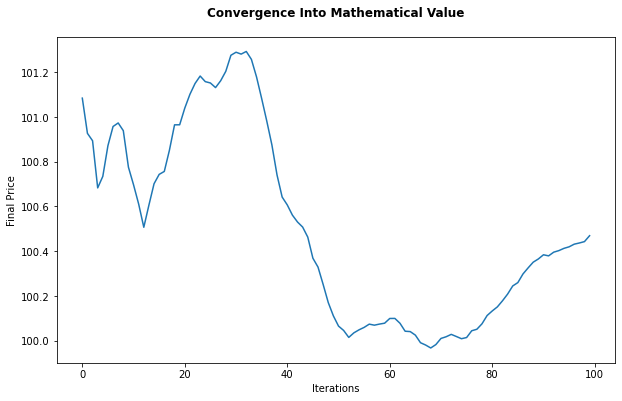

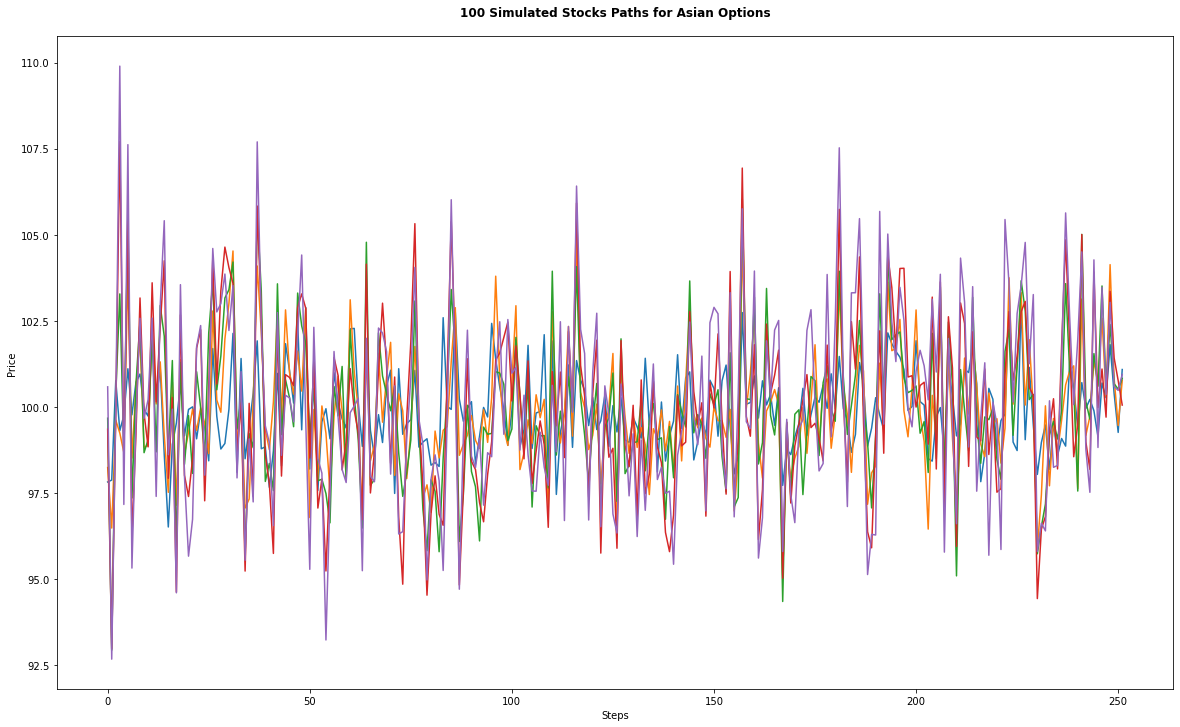

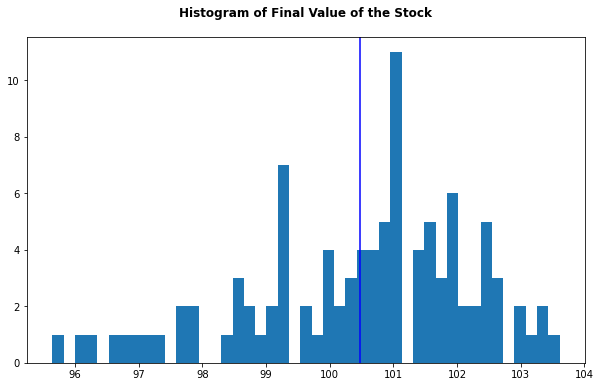

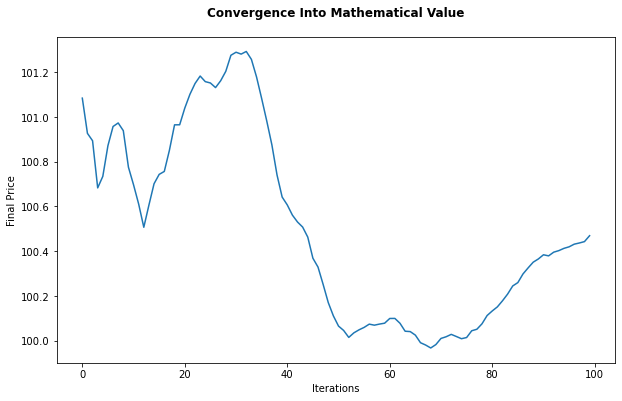

In [34]:
AsianPut = AsianOptionMC_MC('put', 100., 99., 1., 252, .01, 0, .20, 100)
print("Asian Put values")
print(" MC value           Lower Bound         Upper Bound")
print(AsianPut.value)